# Eviction data for NYCEM

THis notebook downloads and formats data for NYCEM from two sources:

* Housing Court data received from OCA and made available to the public by the Housing Data Coalition  https://github.com/housing-data-coalition/oca


* Marshals Eviction data from NYC Open Data    https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4


In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

In /home/deena/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/deena/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/deena/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/deena/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/deena/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

# 1.  OCA Housing Court Data
## Eviction Filings

In [2]:
# download the top level table
index = pd.read_csv('https://s3.amazonaws.com/oca-data/public/oca_index.csv')

#format date
index.fileddate = pd.to_datetime(index.fileddate)

index.shape

(1423641, 12)

In [3]:
# limit to residential eviction filings in NYC courts

courtslist = ['Bronx County Civil Court',
              'Kings County Civil Court',
              'New York County Civil Court',
              'Queens County Civil Court',
              'Richmond County Civil Court',
              'Harlem Community Justice Center',
              'Redhook Community Justice Center']

filing = index[(index.propertytype=='Residential')&\
               (index.classification.isin(['Holdover','Non-Payment']))&\
               (index.court.isin(courtslist))]
filing.shape

(956174, 12)

In [4]:
filing.count()

indexnumberid                956174
court                        956174
fileddate                    956174
propertytype                 956174
classification               956174
specialtydesignationtypes    460876
status                       956174
disposeddate                 753326
disposedreason               753326
firstpaper                   956174
primaryclaimtotal            956129
dateofjurydemand                363
dtype: int64

In [5]:
filing.nunique()

indexnumberid                956174
court                             7
fileddate                      1512
propertytype                      1
classification                    2
specialtydesignationtypes       345
status                            8
disposeddate                   1479
disposedreason                 5370
firstpaper                       11
primaryclaimtotal            370225
dateofjurydemand                291
dtype: int64

In [6]:
filing.fileddate.min(),filing.fileddate.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2021-09-20 00:00:00'))

In [7]:
# download the address table
address = pd.read_csv('https://s3.amazonaws.com/oca-data/public/oca_addresses.csv')

# format zipcode, drop anything after hyphen
address.postalcode = address.postalcode.str.split('-').str[0].astype(int)

address.shape

(1423666, 4)

In [8]:
address.count()

indexnumberid    1423666
city             1423666
state            1423666
postalcode       1423666
dtype: int64

In [9]:
address.nunique()

indexnumberid    1423641
city                 963
state                 18
postalcode           805
dtype: int64

In [10]:
address.postalcode.sort_values()

895137         0
751643         0
920994         0
1399690        0
415549         0
           ...  
893830     99999
1338459    99999
1338603    99999
1074898    99999
1009641    99999
Name: postalcode, Length: 1423666, dtype: int64

In [11]:
# some filings have mulitple addresses, they likely have the same zip
# so dropping any duplicates before adding a zipcode column onto filings table
df = address[['indexnumberid','postalcode']].drop_duplicates()

filing = filing.merge(df,how='left',on='indexnumberid')
filing.shape

(956174, 13)

In [12]:
filing.count()

indexnumberid                956174
court                        956174
fileddate                    956174
propertytype                 956174
classification               956174
specialtydesignationtypes    460876
status                       956174
disposeddate                 753326
disposedreason               753326
firstpaper                   956174
primaryclaimtotal            956129
dateofjurydemand                363
postalcode                   956174
dtype: int64

In [13]:
# number of filings by month
filingsByMonth = filing.groupby([filing.fileddate.dt.to_period('m')])\
                    [['indexnumberid']].nunique()
filingsByMonth.rename(columns={'indexnumberid':'New Eviction Filings'},inplace=True)
filingsByMonth.index.rename('Date',inplace=True)
filingsByMonth

,New Eviction Filings
Date,
2016-01,19913
2016-02,21993
2016-03,19679
2016-04,16564
2016-05,17465
2016-06,18888
2016-07,18409
2016-08,22262
2016-09,20056


<AxesSubplot:title={'center':'eviction filings by month'}, xlabel='Date'>

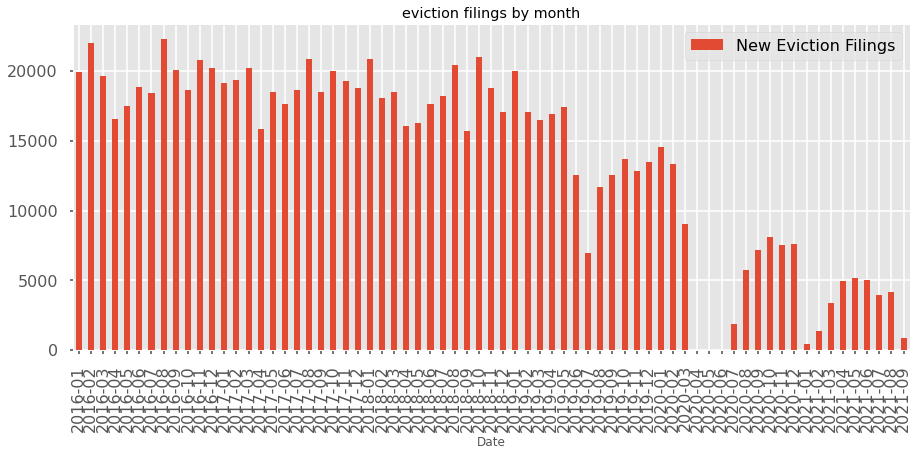

In [14]:
filingsByMonth.plot(kind='bar',figsize=(15,6),title='eviction filings by month')

In [15]:
# filings by month and zip

filingsByMonthZip = filing.groupby([filing.fileddate.dt.to_period('m'),
                                   filing.postalcode])[['indexnumberid']].nunique()

filingsByMonthZip.rename(columns={'indexnumberid':'New Eviction Filings'},inplace=True)

filingsByMonthZip.index.rename(['Date','Zipcode'],inplace=True)

filingsByMonthZip

New Eviction Filings
Date    Zipcode                      
2016-01 10001                      52
        10002                     164
        10003                      44
        10004                       1
        10005                       5
...                               ...
2021-09 11429                       1
        11432                       1
        11434                       7
        11436                       1
        11691                       1

[11822 rows x 1 columns]

## COVID-19 Declaration Events

In [16]:
# download the event table
event = pd.read_csv('https://s3.amazonaws.com/oca-data/public/oca_events.csv')

#format date
event.fileddate = pd.to_datetime(event.fileddate)

# filter to events related to NYC, residential, eviction filings
event = event[event.indexnumberid.isin(filing.indexnumberid)]

event.drop_duplicates(inplace=True)

event.shape

(2088261, 6)

In [17]:
event.count()

indexnumberid         2088261
eventname             2088261
fileddate             2088261
feetype                960264
filingpartiesroles    1518999
answertype             412138
dtype: int64

In [18]:
event.nunique()

indexnumberid         956156
eventname                 90
fileddate               1683
feetype                    3
filingpartiesroles        80
answertype                 2
dtype: int64

In [19]:
# covid related events
# i.e. covid hardship filings
covevent = event[event.eventname.fillna('-').str.contains('COVID')]
covevent.count()

indexnumberid         54514
eventname             54514
fileddate             54514
feetype                   0
filingpartiesroles    52741
answertype                0
dtype: int64

In [20]:
covevent.nunique()

indexnumberid         50827
eventname                 6
fileddate               283
feetype                   0
filingpartiesroles       15
answertype                0
dtype: int64

In [21]:
# only keep the first covid related declaration for the case id
covevent.sort_values(['indexnumberid','fileddate'],inplace=True)
covevent.drop_duplicates(subset='indexnumberid',inplace=True)

covevent.count()

/home/deena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/deena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


indexnumberid         50827
eventname             50827
fileddate             50827
feetype                   0
filingpartiesroles    49271
answertype                0
dtype: int64

In [22]:
# list top covid event names
covevent.groupby('eventname')[['eventname']].count().\
rename(columns={'eventname':'count'}).sort_values('count',ascending=False)

,count
eventname,
COVID-19 Hardship Declaration Filed - EEFPA Residential,26127
COVID-19 Affidavit of Service of Notice and Hardship Declaration Filed - EEFPA Residential,14966
COVID-19 Hardship Declaration Filed,9383
COVID-19 Affidavit of Service of Notice and Hardship Declaration Filed,310
COVID-19 Hardship Declaration Filed - EPSBA Commercial,22
COVID-19 Affidavit of Service of Notice and Hardship Declaration Filed - EPSBA Commercial,19


In [23]:
# merge zipcode
# some filings have mulitple addresses, they likely have the same zip
# so dropping any duplicates before adding a zipcode column onto events table
df = address[['indexnumberid','postalcode']].drop_duplicates()

covevent = covevent.merge(df,how='left',on='indexnumberid')
covevent.count()

indexnumberid         50827
eventname             50827
fileddate             50827
feetype                   0
filingpartiesroles    49271
answertype                0
postalcode            50827
dtype: int64

In [24]:
covevent[covevent.postalcode.isnull()].shape

(0, 7)

In [25]:
# number of covid declarations by month (1 per filing)
covByMonth = covevent.groupby([covevent.fileddate.dt.to_period('m')])\
                    [['indexnumberid']].nunique()
covByMonth.rename(columns={'indexnumberid':'COVID19 Declarations'},inplace=True)
covByMonth.index.rename('Date',inplace=True)
covByMonth

,COVID19 Declarations
Date,
2001-02,1
2020-01,2
2020-02,1
2020-03,2
2020-04,1
2020-08,3
2020-09,1
2020-10,1
2020-11,2


<AxesSubplot:title={'center':'covid declarations by month'}, xlabel='Date'>

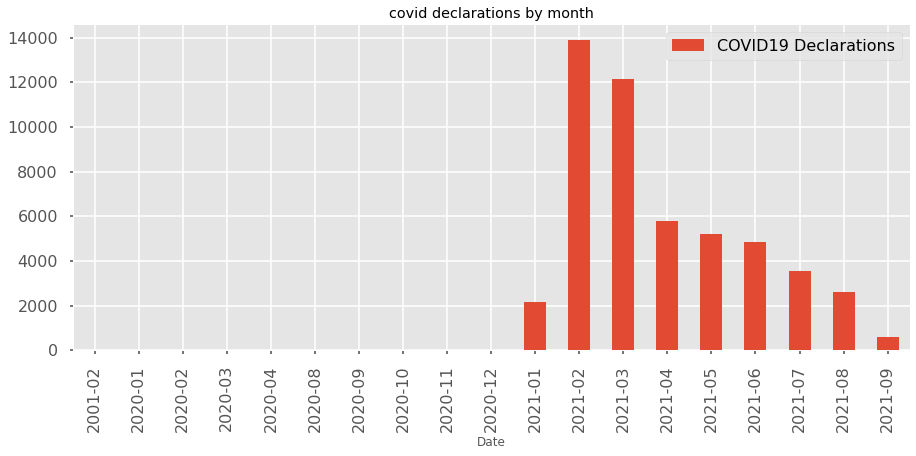

In [26]:
covByMonth.plot(kind='bar',figsize=(15,6),title='covid declarations by month')

In [27]:
# number of covid declarations by month and zip (1 per filing)

covByMonthZip = covevent.groupby([covevent.fileddate.dt.to_period('m'),
                                   covevent.postalcode])[['indexnumberid']].nunique()

covByMonthZip.rename(columns={'indexnumberid':'COVID19 Declarations'},inplace=True)

covByMonthZip.index.rename(['Date','Zipcode'],inplace=True)

covByMonthZip

COVID19 Declarations
Date    Zipcode                      
2001-02 10451                       1
2020-01 10452                       1
        11691                       1
2020-02 10301                       1
2020-03 10456                       1
...                               ...
2021-09 11432                       7
        11434                       6
        11435                       1
        11691                       4
        11694                       1

[1538 rows x 1 columns]

# Marshall's Evictions Data

Residential evictions

from NYC Open Data: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4

In [28]:
url = 'https://data.cityofnewyork.us/resource/6z8x-wfk4.json'

#filters = "?$select=bbl,address,bldgclass,ownername,numbldgs&$limit=1000000"
filters = "?residential_commercial_ind='Residential'&$limit=1000000"

marsh = pd.read_json(url+filters)

# format date
marsh.executed_date = pd.to_datetime(marsh.executed_date)

marsh.shape

(60836, 20)

In [29]:
marsh.count()

court_index_number            60836
docket_number                 60836
eviction_address              60836
eviction_apt_num              52737
executed_date                 60836
marshal_first_name            60836
marshal_last_name             60836
residential_commercial_ind    60836
borough                       60836
eviction_zip                  60836
ejectment                     60836
eviction_possession           60836
latitude                      56369
longitude                     56369
community_board               56369
council_district              56369
census_tract                  56369
bin                           56307
bbl                           56307
nta                           56369
dtype: int64

In [30]:
marsh.nunique()

court_index_number            56831
docket_number                 54153
eviction_address              35869
eviction_apt_num               5510
executed_date                   795
marshal_first_name               25
marshal_last_name                27
residential_commercial_ind        1
borough                           5
eviction_zip                    207
ejectment                         2
eviction_possession               3
latitude                      27125
longitude                     26663
community_board                  18
council_district                 51
census_tract                   1282
bin                           27942
bbl                           25958
nta                             190
dtype: int64

In [31]:
marsh.eviction_possession.value_counts()

Possession     59602
Eviction        1233
Unspecified        1
Name: eviction_possession, dtype: int64

In [32]:
marsh.executed_date.min(), marsh.executed_date.max()

(Timestamp('2017-01-03 00:00:00'), Timestamp('2070-03-29 00:00:00'))

In [33]:
marsh.eviction_zip.sort_values()

9780         0
58849        0
50231        0
26827    10000
10738    10001
         ...  
24444    11694
57203    11694
11803    11694
17277    11698
11519    12221
Name: eviction_zip, Length: 60836, dtype: int64

In [34]:
# number of evictions by month
evicByMonth = marsh.groupby([marsh.executed_date.dt.to_period('m')])\
                    [['court_index_number']].nunique()

evicByMonth.rename(columns={'court_index_number':'Marshals Evictions Executed'},
                   inplace=True)

evicByMonth.index.rename('Date',inplace=True)

evicByMonth

,Marshals Evictions Executed
Date,
2017-01,1969
2017-02,1507
2017-03,1813
2017-04,1646
2017-05,1847
2017-06,1767
2017-07,1504
2017-08,1840
2017-09,1614


<AxesSubplot:title={'center':'cases ending with marshals evictions by month'}, xlabel='Date'>

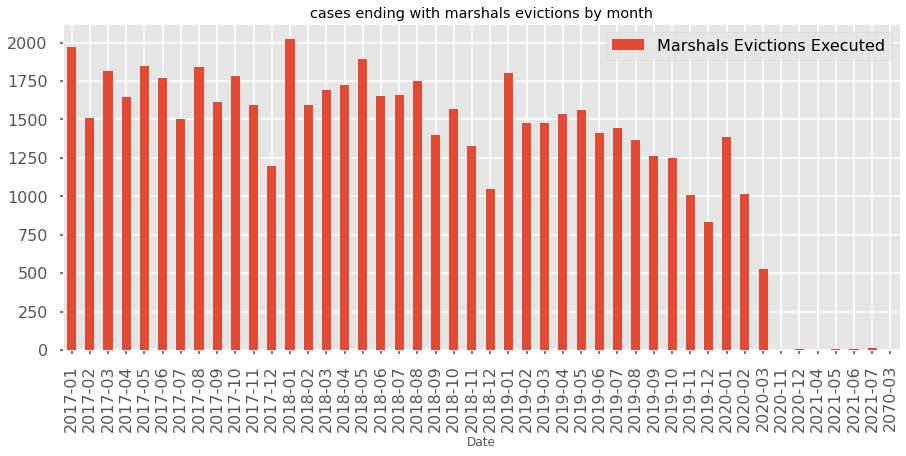

In [35]:
evicByMonth. plot(kind='bar',figsize=(15,6),
                  title='cases ending with marshals evictions by month')

In [36]:
# evictions by month and zip

evicByMonthZip = marsh.groupby([marsh.executed_date.dt.to_period('m'),
                                   marsh.eviction_zip])[['court_index_number']].nunique()

evicByMonthZip.rename(columns={'court_index_number':'Marshals Evictions Executed'},
                   inplace=True)

evicByMonthZip.index.rename(['Date','Zipcode'],inplace=True)

evicByMonthZip

Marshals Evictions Executed
Date    Zipcode                             
2017-01 10001                              7
        10002                             13
        10003                              8
        10005                              3
        10007                              2
...                                      ...
2021-07 11201                              1
        11210                              1
        11215                              1
        11216                              1
2070-03 10458                              1

[6270 rows x 1 columns]

## join the three tables together

<AxesSubplot:xlabel='Date'>

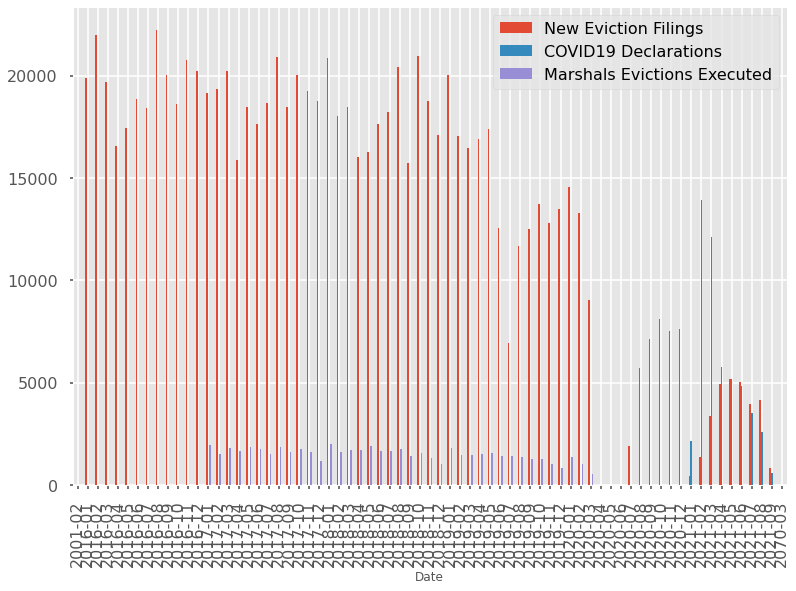

In [37]:
byMonth = filingsByMonth.join(covByMonth,how='outer').join(evicByMonth,how='outer')

byMonth.plot(kind='bar')

In [38]:
byMonth

,New Eviction Filings,COVID19 Declarations,Marshals Evictions Executed
Date,,,
2001-02,NaN,1.0,NaN
2016-01,19913.0,NaN,NaN
2016-02,21993.0,NaN,NaN
2016-03,19679.0,NaN,NaN
2016-04,16564.0,NaN,NaN
2016-05,17465.0,NaN,NaN
2016-06,18888.0,NaN,NaN
2016-07,18409.0,NaN,NaN
2016-08,22262.0,NaN,NaN


In [39]:
byMonthZip = filingsByMonthZip.join(covByMonthZip,
                                    how='outer').join(evicByMonthZip,how='outer')

byMonthZip

New Eviction Filings  COVID19 Declarations  \
Date    Zipcode                                               
2001-02 10451                     NaN                   1.0   
2016-01 10001                    52.0                   NaN   
        10002                   164.0                   NaN   
        10003                    44.0                   NaN   
        10004                     1.0                   NaN   
...                               ...                   ...   
2021-09 11435                     NaN                   1.0   
        11436                     1.0                   NaN   
        11691                     1.0                   4.0   
        11694                     NaN                   1.0   
2070-03 10458                     NaN                   NaN   

                 Marshals Evictions Executed  
Date    Zipcode                               
2001-02 10451                            NaN  
2016-01 10001                            NaN  
        10002                            NaN  
        10003                            NaN  
        10004                            NaN  
...                                      ...  
2021-09 11435                            NaN  
        11436                            NaN  
        11691                            NaN  
        11694                            NaN  
2070-03 10458                            1.0  

[12002 rows x 3 columns]

In [41]:
# write to file

#byMonth.to_csv('OCAforNYCEM_month_2021_09_21.csv',index=True)
#byMonthZip.to_csv('OCAforNYCEM_month_zip_2021_09_21.csv',index=True)